<h1><center>Prediction using Topological Data Analysis</center></h1>
<img src="https://geotg.com/wp-content/uploads/2017/11/data-analytics.png" width="70%">
<p style="text-align: center;">Image from: https://geotg.com/data-analytics/</p>

This notebook will demonstrate how TDA can be used to improve prediction. To do so, the notebook will first use basic statistical methods to build a model and then run a regression. Afterwards, the notebook will use on Mapper improve the predictivity of the model.

In [34]:
from Topological_ML import tda_function as tdap
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import kmapper as km
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import ensemble
from pandas.plotting import scatter_matrix
from sklearn import metrics
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

## Part A
#### Statistical Analysis
This section will use statistical tools to build a model.

In [35]:
# Import data from scikit-learn
boston = sklearn.datasets.load_boston(return_X_y=False)

# Convert dataset into pandas dataframe
df = tdap.numpy_to_pandas(boston)

# Dimension of data
print('The Boston house-prices dataset dataset has', df.shape[0], 'rows and', df.shape[1], 'columns.')
df.head(10)

The Boston house-prices dataset dataset has 506 rows and 14 columns.


CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2  
5     18.7  394.12   5.21    28.7  
6     15.2  395.60  12.43    22.9  
7     15.2  396.90  19.15    27.1  
8     15.2  386.63  29.93    16.5  
9     15.2  386.71  17.10    18.9

In [38]:
X = df.drop(['target'], axis = 1)
y = df['target']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

lm.intercept_

36.357041376595205

In [40]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

Attribute Coefficients
0       CRIM     -0.12257
1         ZN    0.0556777
2      INDUS  -0.00883428
3       CHAS      4.69345
4        NOX     -14.4358
5         RM      3.28008
6        AGE  -0.00344778
7        DIS     -1.55214
8        RAD      0.32625
9        TAX   -0.0140666
10   PTRATIO    -0.803275
11         B   0.00935369
12     LSTAT    -0.523478

In [41]:
# Model prediction on train data
y_pred = lm.predict(X_train)

# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7465991966746854
Adjusted R^2: 0.736910342429894
MAE: 3.08986109497113
MSE: 19.07368870346903
RMSE: 4.367343437774162


#### Exploratory Data Analysis

In [5]:
# Descriptive statistics of data
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT      target  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12d5ce4e0>,
      dtype=object)

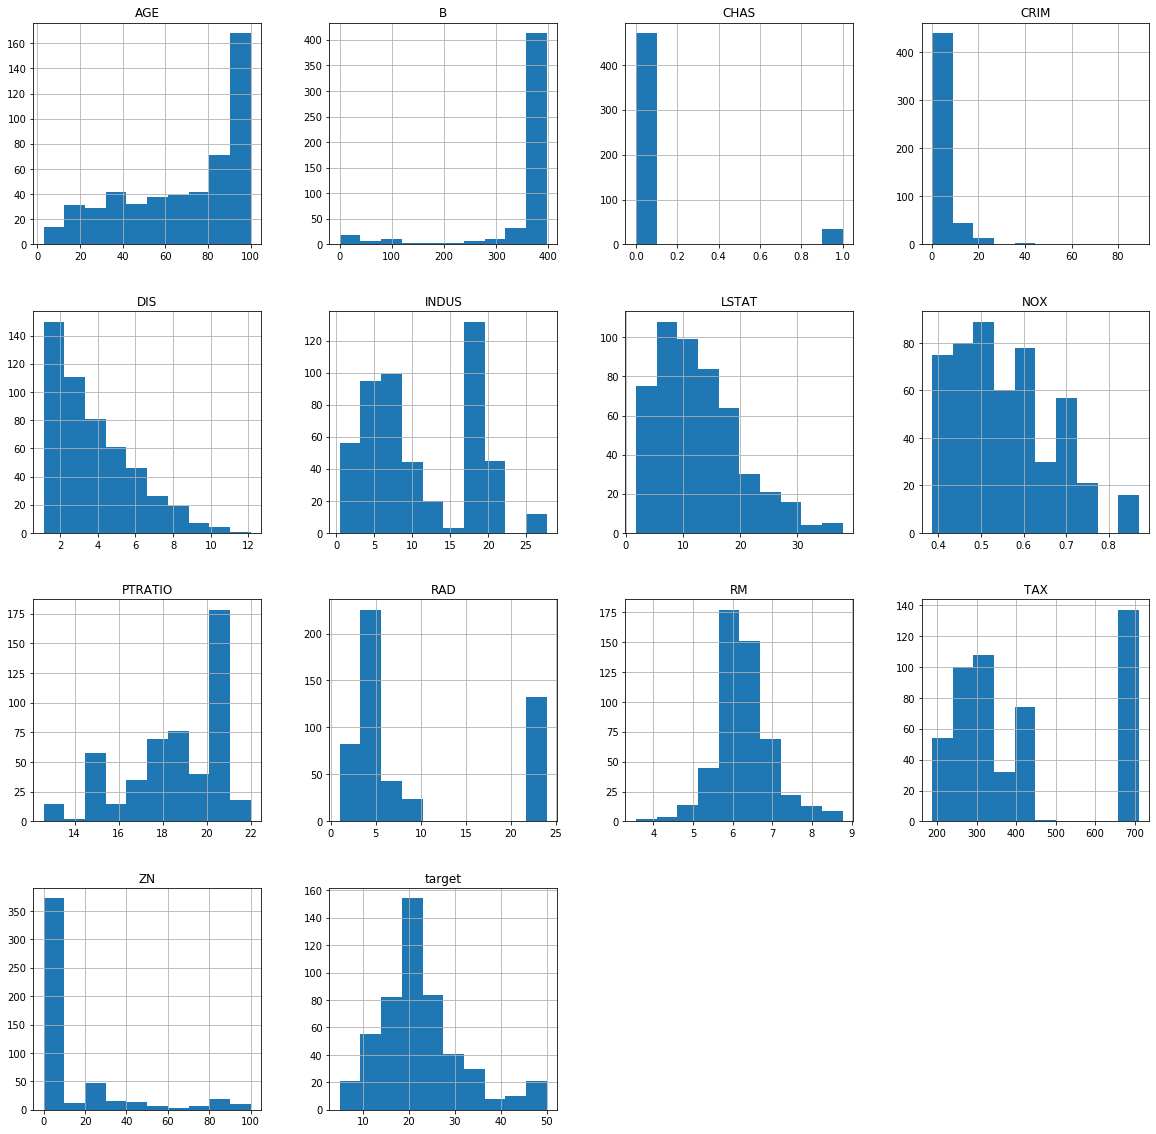

In [21]:
df.hist(bins=10, figsize=[20,20])

The varaibles are very skewed so we need to transform them.

In [24]:
df_log = np.log(df + 1)
df_log.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     0.813418    0.953873    2.302089    0.047945    0.438587    1.981139   
std      1.022731    1.620831    0.663362    0.176055    0.072948    0.096500   
min      0.006300    0.000000    0.378436    0.000000    0.325700    1.517542   
25%      0.078853    0.000000    1.822935    0.000000    0.370874    1.929418   
50%      0.228336    0.000000    2.369309    0.000000    0.430483    1.975261   
75%      1.542674    2.602690    2.949688    0.000000    0.484892    2.031236   
max      4.499545    4.615121    3.358290    0.693147    0.626473    2.280339   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     4.112104    1.479648    2.054483    5.934259    2.961462    5.759511   
std      0.589774    0.413390    0.751839    0.395337    0.117926    0.729424   
min      1.360977    0.755934    0.693147    5.236442    2.610070    0.277632   
25%      3.829184    1.131459    1.609438    5.634790    2.912351    5.930593   
50%      4.363095    1.436855    1.791759    5.802118    2.998226    5.972384   
75%      4.554666    1.822659    3.218876    6.502790    3.054001    5.984503   
max      4.615121    2.574633    3.218876    6.568078    3.135494    5.986201   

            LSTAT      target  
count  506.000000  506.000000  
mean     2.475610    3.085437  
std      0.539033    0.386966  
min      1.004302    1.791759  
25%      2.073162    2.891757  
50%      2.514464    3.100092  
75%      2.887869    3.258097  
max      3.662792    3.931826

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bf6a438>,
      dtype=object)

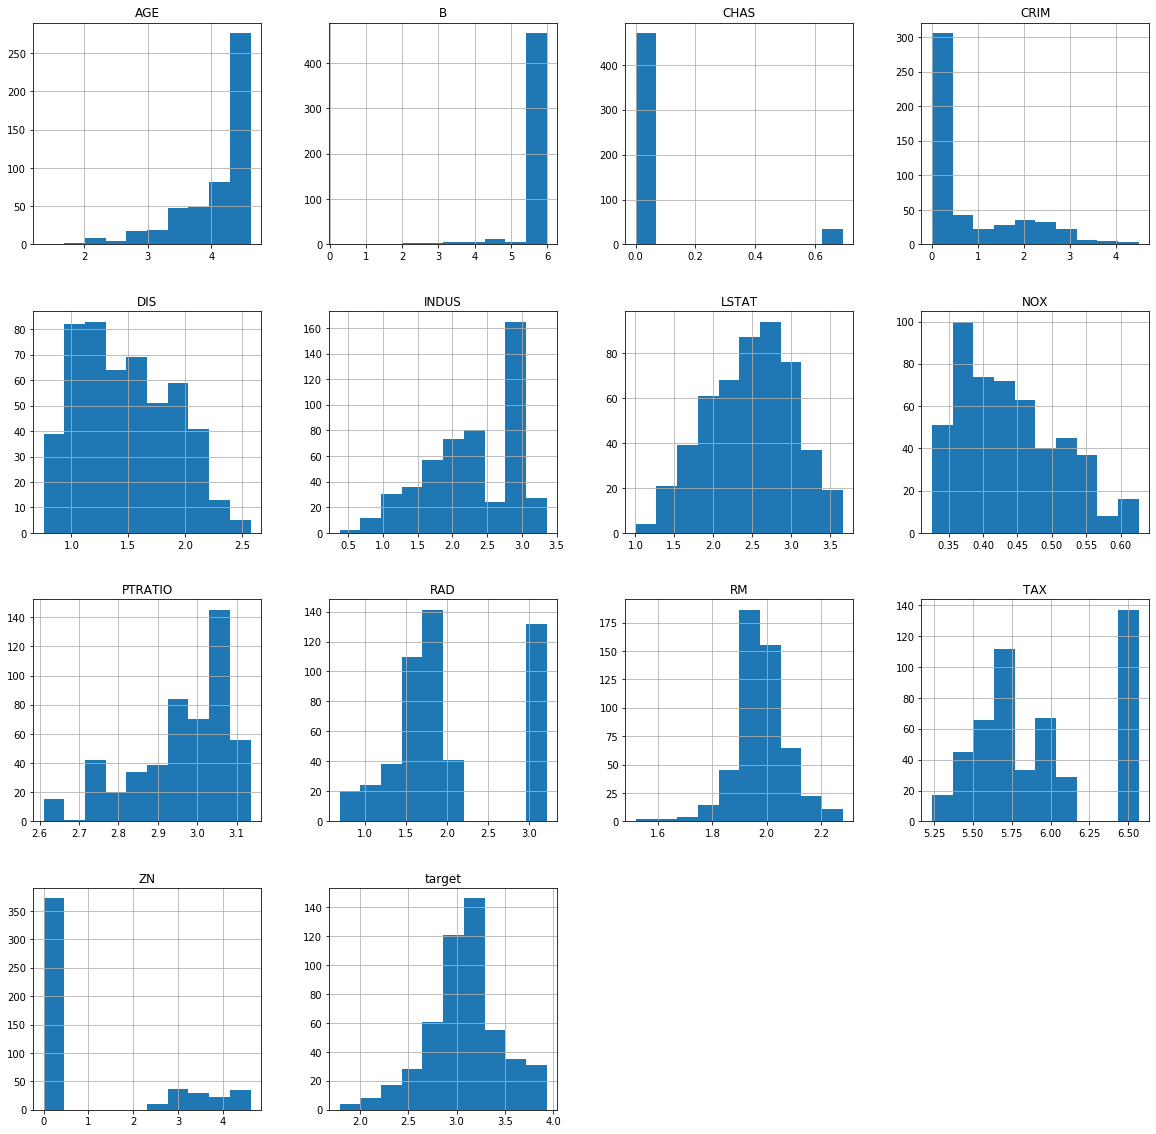

In [25]:
df_log.hist(bins=10, figsize=[20,20])

In [28]:
# standardize data
X = df_log.drop('target', axis=1)
y = df_log.target
normalized_X = preprocessing.normalize(X)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e2e4240>,
      dtype=object)

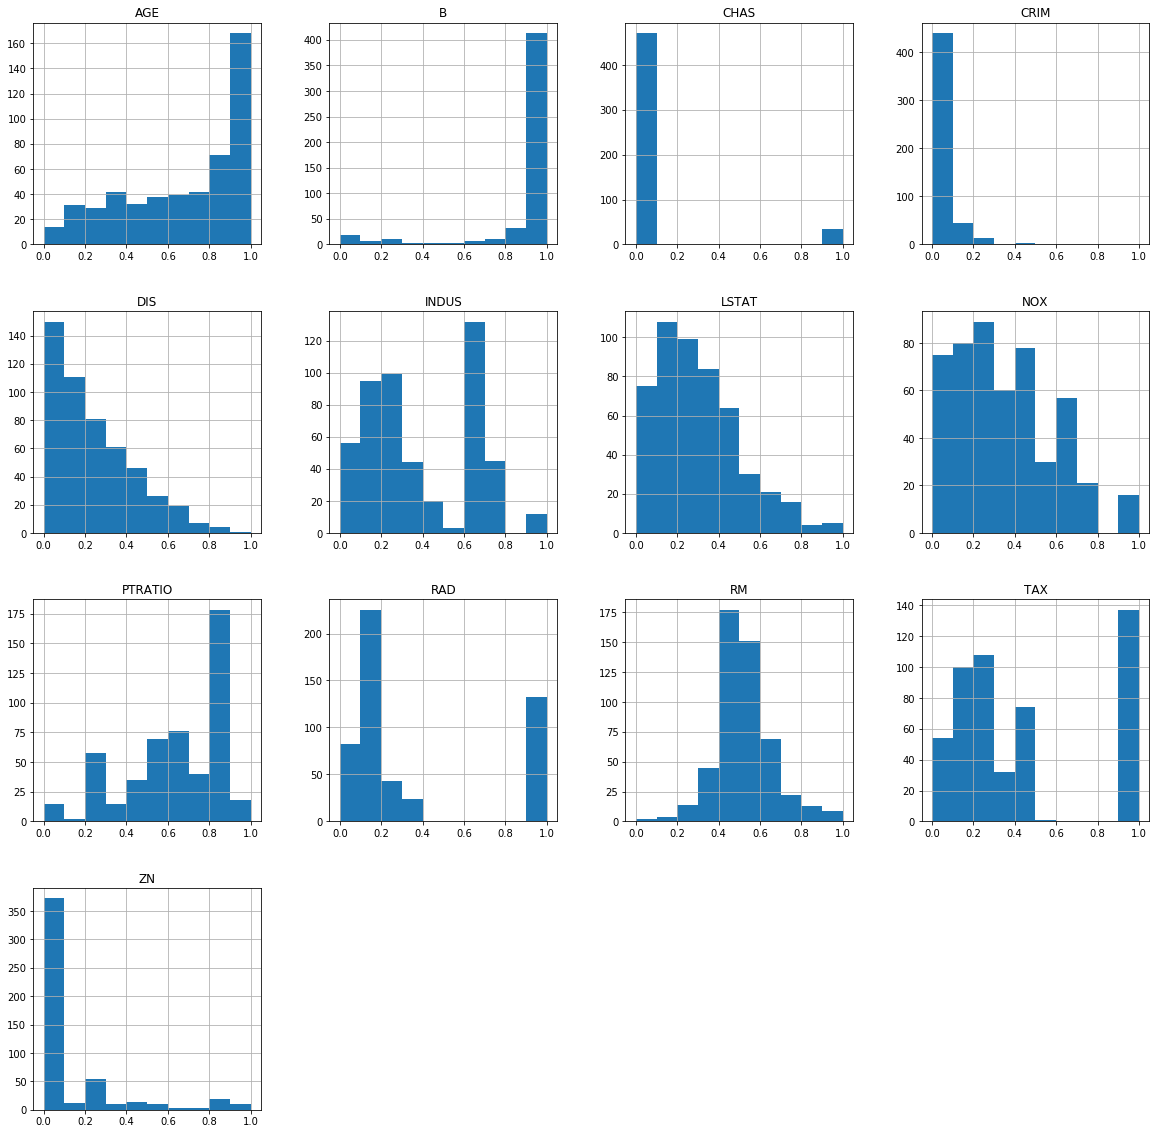

In [29]:
# convert array to panda df 
X_df = pd.DataFrame(X)
# histogram of normalized X
X_df.hist(bins=10, figsize=[20,20])

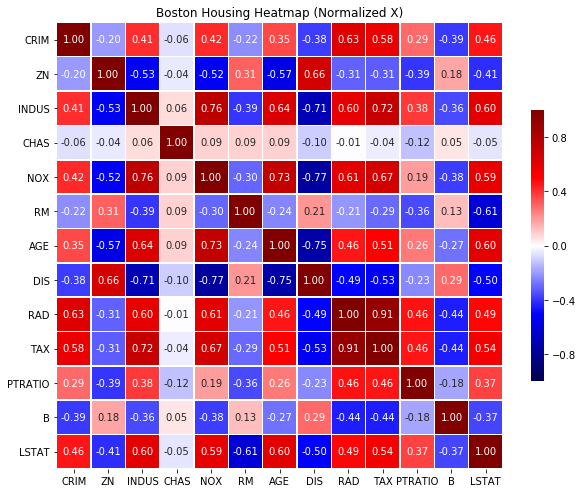

In [31]:
# correlation heatmap
plt.figure(figsize = (10,10))

sns.heatmap(X_df.corr(), annot = True, center=0, square = True, linewidths = .5,
            cbar_kws={"shrink": .5}, fmt = '.2f', cmap = 'seismic', vmin = -1, vmax=1)

plt.title('Boston Housing Heatmap (Normalized X)')

plt.show()

In [29]:
# detect and delete variables with multicollinearity issue
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif_(X, thresh=6):
    variables = list(range(X.shape[1]))
    dropped_var = []
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:,variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            dropped_var.append(variables[maxloc])
            del variables[maxloc]
            dropped = True
    return dropped_var

# use vif to remove multicollinearity
test = calculate_vif_(X_df)
print(test)

# check final vif scores
vif = df.drop(['target','PTRATIO','B','TAX','AGE','RM','NOX','INDUS'], axis=1)
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

NameError: name 'X_df' is not defined

#### Multiple Linear Regression

In [31]:
# feature variables
X = df.drop(['target','PTRATIO','B','TAX','AGE','RM','NOX','INDUS'], axis=1)

# response variable
y = df['target']

# split data into training and testing (80:20)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Feature selection using sequential backward selection(sbs)
sbs = SFS(LinearRegression(), k_features = (1,6), forward = False, floating = False, cv = 0)
sbs.fit(X_train, y_train)
print(sbs.k_feature_names_)

# Feature selection using sequential foward selection(sfs)
sfs = SFS(LinearRegression(), k_features = (1,6), forward = True, floating = False, scoring = 'r2', cv = 0)
sfs.fit(X_train, y_train)
print(sfs.k_feature_names_)

# Feature selection using stepwise selection (sws)
sws = SFS(LinearRegression(), k_features=(1,6), forward=True, floating=True,cv=0)
sws.fit(X_train, y_train)
print(sws.k_feature_names_)

('0', '1', '2', '3', '4', '5')
('0', '1', '2', '3', '4', '5')
('0', '1', '2', '3', '4', '5')


In [32]:
fit = LinearRegression().fit(X_train,y_train)
print("train model score:",fit.score(X_train,y_train))
y_pred = fit.predict(X_test)
print(len(y_pred))
print(len(y_test))
print(y_pred[0:5])
print(y_test[0:5])
print("test model score:",fit.score(X_test,y_test))

train model score: 0.6128872200066375
102
102
[27.22520204 37.62706188 19.7143393  26.92865235 17.82178099]
173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: target, dtype: float64
test model score: 0.6138897851750331


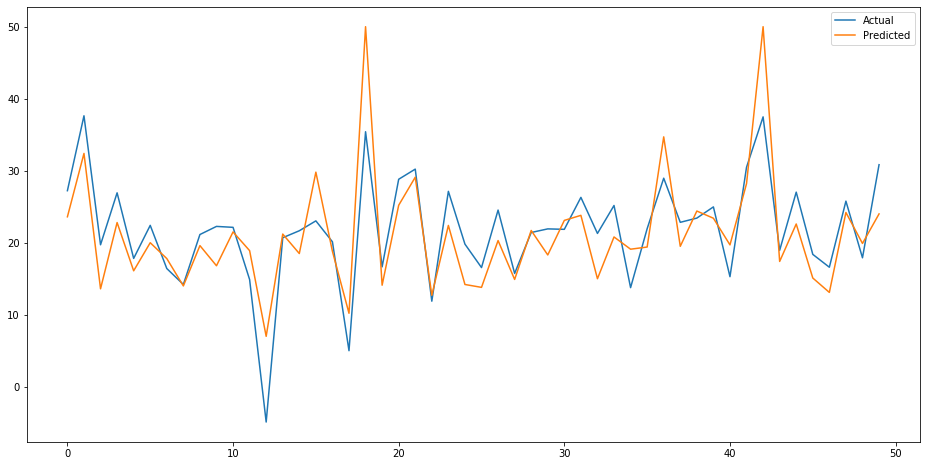

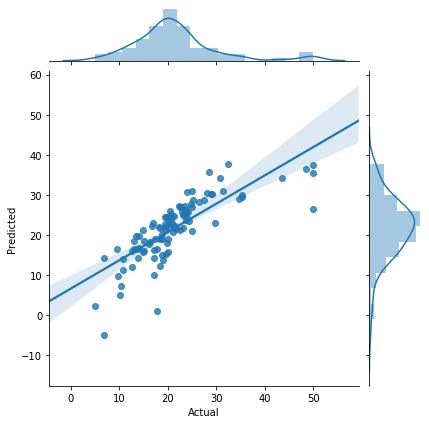

In [33]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',)

## Part B
#### Topological Data Analysis
We now use TDA for prediction using MAPPER.

In [42]:
def numpy_to_pandas(sklearn_data):
    """
    Converts scikit-learn numpy data into pandas dataframe.
    Input: name of dataframe
    Output: pandas dataframe
    """
    data = pd.DataFrame(data=sklearn_data.data, columns=sklearn_data.feature_names)
    data['target'] = pd.Series(sklearn_data.target)
    return data

In [43]:
boston_housing = sklearn.datasets.load_boston(return_X_y=False)
df = numpy_to_pandas(boston_housing)

features = [c for c in df.columns if c not in ['response']]

X = np.array(df[features])
y = np.array(df.target)

In [46]:
mapper = km.KeplerMapper(verbose=0)
lens = mapper.fit_transform(X, projection=[0])
graph = mapper.map(lens, X, nr_cubes=6, overlap_perc=0.2)

In [49]:
lens = mapper.fit_transform(X, projection=sklearn.manifold.TSNE(random_state=1234), scaler=None)

# Create the graph of the nerve of the corresponding pullback
graph = mapper.map(lens, X, clusterer=sklearn.cluster.KMeans(n_clusters=2, random_state=1234),
                   nr_cubes=20, overlap_perc=0.5)

In [55]:
_ = mapper.visualize(
    graph,
    custom_tooltips=y,
    color_function=y,
    path_html="tor-tda.html",
    title="Detecting encrypted Tor Traffic with Isolation Forest and Nearest Neighbor Distance"
)

In [56]:
# We create a custom 1-D lens with Isolation Forest
def lens_1d(X, rs, v):
    model = ensemble.IsolationForest(random_state = rs)
    model.fit(X)
    lens1 = model.decision_function(X).reshape((X.shape[0], 1))
    mapper = km.KeplerMapper(verbose = v)
    lens2 = mapper.fit_transform(X, projection="l2norm")
    lens = np.c_[lens1, lens2]
    return lens

In [57]:
lens = lens_1d(X, 1729, 3)

/Users/shawkmasboob/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/shawkmasboob/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: l2norm
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (506, 14)

..Projecting data using: l2norm

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))



In [40]:
a = pd.DataFrame({"A": [0,0]})
lens_1d(a,123,1)

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: l2norm
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (2, 1)

..Projecting data using: l2norm

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))



/Users/shawkmasboob/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/shawkmasboob/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


array([[0., 0.],
       [0., 0.]])

In [58]:
# Create the simplicial complex
mapper = km.KeplerMapper(verbose=3)
graph = mapper.map(lens, X, cover=km.Cover(n_cubes=15, perc_overlap=0.4), 
                   clusterer=sklearn.cluster.KMeans(n_clusters=2, random_state=1618033))

KeplerMapper()
Mapping on data shaped (506, 14) using lens shaped (506, 2)

Minimal points in hypercube before clustering: 2
Creating 225 hypercubes.
Cube_0 is empty.

   > Found 2 clusters.

Cube_2 is empty.

Cube_3 is empty.

   > Found 2 clusters.

Cube_5 is empty.

Cube_6 is empty.

Cube_7 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

Cube_12 is empty.

   > Found 2 clusters.

Cube_14 is empty.

Cube_15 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

Cube_18 is empty.

Cube_19 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

Cube_26 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   >

In [59]:
_ = mapper.visualize(
    graph,
    custom_tooltips=y,
    color_function=y,
    path_html="tor-tda.html",
    title="Detecting encrypted Tor Traffic with Isolation Forest and Nearest Neighbor Distance"
)

Wrote visualization to: tor-tda.html
